<a href="https://colab.research.google.com/github/RahulJuluru2/unit3assignments/blob/main/U3W17_37_Speech_Emotion_Recognition_C_RJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

### Learning Objectives

At the end of the experiment you will be able to :

- understand how to implement keras neural networks on MFCC features

In [1]:
#@title Experiment Explanation Video
from IPython.display import HTML

HTML("""<video width="850" height="480" controls>
  <source src="https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/Walkthrough/Speech_emotion_recognition.mp4" type="video/mp4">
</video>
""")


### Dataset

### Description



In this experiment we will use Ryerson Audio-Visual Database of Emotional Speech and Song ([RAVDESS - Livingstone SR, Russo FA (2018)](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0196391)) which includes 1432 voices of 24 professional actors (12 female, 12 male). Speech emotions includes calm, happy, sad, angry, fearful, surprise, and disgust expressions. Each expression is produced at two levels of emotional intensity (normal, strong), with an additional neutral expression.

**File naming convention:** Each of the 1432 files has a unique filename. The filename consists of a 7-part numerical identifier (e.g., 03-01-06-01-02-01-12.wav). These identifiers define the stimulus characteristics:

*Filename identifiers*
- Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
- Vocal channel (01 = speech, 02 = song).
- Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
- Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
- Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
- Repetition (01 = 1st repetition, 02 = 2nd repetition).
- Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

*Filename example: 03-01-06-01-02-01-12.wav*
- Audio-only (03)
- Speech (01)
- Fearful (06)
- Normal intensity (01)
- Statement "Dogs are sitting by the door" (02)
- 1st Repetition (01)
- 12th Actor (12) -> Female, as the actor ID number is even.


### Domain Information

When we listen to an audio sample it changes constantly. This means that speech is non-stationary signal. Therefore, normal signal processing techniques cannot be applied to get features from audio. However, if the speech signal is observed using a very small duration window, the speech content in that small duration appears to be  stationary. That brought in the concept of short-time processing of speech. 

MFCC is a technique for short-time processing of speech. 


### Setup Steps

In [2]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2216842" #@param {type:"string"}


In [3]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "9959488784" #@param {type:"string"}


In [4]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

ipython = get_ipython()
  
notebook= "U3W17_37_Speech_Emotion_Recognition_C" #name of the notebook

def setup(): 
    ipython.magic("sx pip install librosa")
    ipython.magic("sx pip install wavio")
    ipython.magic("sx wget -qq https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/ravdess.zip")
    ipython.magic("sx unzip ravdess.zip")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None
    
    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getWalkthrough() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook, "feedback_walkthrough":Walkthrough ,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None
  
  
def getWalkthrough():
  try:
    if not Walkthrough:
      raise NameError
    else:
      return Walkthrough
  except NameError:
    print ("Please answer Walkthrough Question")
    return None
  
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None
  

def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None
  

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup() 
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


### Importing required packages


In [5]:
import os
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

## Data Exploration and Visualization

Data Exploration and Visualization helps us to understand the data

### Visualization of a sample audio signal in time series domain

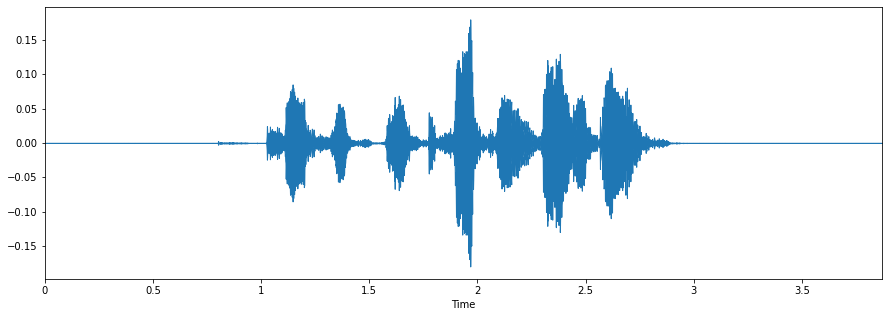

In [6]:
train_audio_path = 'ravdess/data'

# librosa is used for analyzing and extracting features of an audio signal
data, sampling_rate = librosa.load(train_audio_path+'/angry/03-01-05-01-01-01-01.wav')
plt.figure(figsize=(15, 5))

#librosa.display.waveplot is used to plot waveform of amplitude vs time
librosa.display.waveplot(data, sr=sampling_rate)
plt.show()

**Playing an audio**

In [7]:
ipd.Audio(data, rate=sampling_rate)

### Visualize the number of recordings for each emotion

In [8]:
labels = os.listdir(train_audio_path)
print(labels)

['neutral', 'angry', 'happy', 'surprised', 'sad', 'disgust', 'calm', 'fearful']


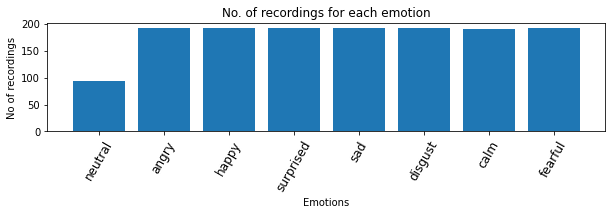

In [9]:
#find count of each label and plot bar graph
no_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    no_of_recordings.append(len(waves))
    
#bar plot
plt.figure(figsize=(10,2))
index = np.arange(len(labels))
plt.bar(index, no_of_recordings)
plt.xlabel('Emotions', fontsize=10)
plt.ylabel('No of recordings', fontsize=10)
plt.xticks(index, labels, fontsize=12, rotation=60)
plt.title('No. of recordings for each emotion')
plt.show()

### Vizualize the distribution of the duration of recordings

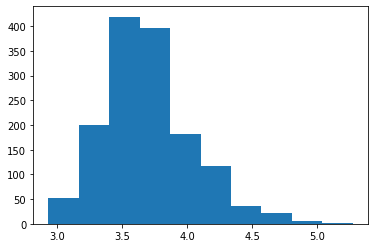

In [10]:
import wavio

duration_of_recordings = []

for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]   
    for wav in waves:
        wav = wavio.read(train_audio_path + '/' + label + '/' + wav)
        duration_of_recordings.append(float(len(wav.data)/wav.rate))

plt.hist(np.array(duration_of_recordings))
plt.show()

## Feature Extraction

Create Mel Frequency Cepstral Coefficient features which represents the short-term power spectrum of a sound and Labels dataset

In [11]:
def extract_feature(file_name):
      X, sample_rate = librosa.load(file_name)
      feature = np.array([])
      mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
      features = np.hstack((feature, mfccs))
      return features

In [12]:
# The below process is going to take some time
all_wave = []
all_label = []

for label in labels:
    print(label)
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        file_path = train_audio_path + '/' + label + '/' + wav
        features = extract_feature(file_path)
        all_wave.append(features)
        all_label.append(label)

# Reshape the 2D array to 3D since the input to the conv1d must be a 3D array
all_wave = np.array(all_wave).reshape(-1, 40, 1)
print("Shape of the features: ", all_wave.shape)

neutral
angry
happy
surprised
sad
disgust
calm
fearful
Shape of the features:  (1432, 40, 1)


Convert the output labels to integer encoded

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(all_label)
classes = list(le.classes_)

Convert the integer encoded labels to a one-hot vector since it is a multi-classification problem

In [14]:
from keras.utils import np_utils
y = np_utils.to_categorical(y, num_classes=len(labels)) 

## Define and Train Model

In [15]:
from sklearn.model_selection import train_test_split

# Split the data into 80% of the train data and 20% of the validate data
x_train, x_val, y_train, y_val = train_test_split(all_wave, y, test_size = 0.2, shuffle=True)

### Implement the model using Keras functional API.

In [16]:
import keras
from keras.layers import Dense, Dropout, Flatten, Conv1D, Input, MaxPooling1D
from keras.models import Model

model = keras.Sequential()
model.add(Conv1D(64, kernel_size=(10), activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(Conv1D(128, kernel_size=(10), activation='relu'))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(labels), activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 31, 64)            704       
                                                                 
 conv1d_1 (Conv1D)           (None, 22, 128)           82048     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 2, 128)           0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 2, 128)            0         
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 256)               65792     
                                                        

In [17]:
# Define the loss function to be categorical cross-entropy since it is a multi-classification problem
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model and evaluate the performance on the validation set
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_val,y_val))

Epoch 1/50
36/36 [==============================] - 12s 13ms/step - loss: 3.2754 - accuracy: 0.1389 - val_loss: 1.9815 - val_accuracy: 0.1847
Epoch 2/50
36/36 [==============================] - 0s 5ms/step - loss: 1.9987 - accuracy: 0.2044 - val_loss: 1.9129 - val_accuracy: 0.2439
Epoch 3/50
36/36 [==============================] - 0s 5ms/step - loss: 1.9310 - accuracy: 0.2437 - val_loss: 1.8783 - val_accuracy: 0.2892
Epoch 4/50
36/36 [==============================] - 0s 5ms/step - loss: 1.8942 - accuracy: 0.2594 - val_loss: 1.8458 - val_accuracy: 0.3171
Epoch 5/50
36/36 [==============================] - 0s 5ms/step - loss: 1.8654 - accuracy: 0.2734 - val_loss: 1.8108 - val_accuracy: 0.3240
Epoch 6/50
36/36 [==============================] - 0s 5ms/step - loss: 1.8252 - accuracy: 0.2873 - val_loss: 1.7914 - val_accuracy: 0.3415
Epoch 7/50
36/36 [==============================] - 0s 5ms/step - loss: 1.7938 - accuracy: 0.2996 - val_loss: 1.7357 - val_accuracy: 0.3624
Epoch 8/50
36/36 [

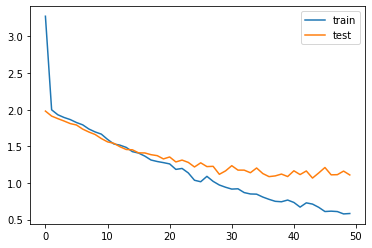

In [18]:
# Vizualize the performance of the model over a period of time
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

## Evaluate the Model

Make predictions on the provided test samples

In [19]:
# The below function predicts emotion for the given audio
def predict(audio):
    prob=model.predict(audio.reshape(1,40,1))
    index=np.argmax(prob[0])
    return classes[index]

In [20]:
test_sample1 = "ravdess/angry_test_sample.wav"
data, sampling_rate = librosa.load(test_sample1)
prediction = predict(extract_feature(test_sample1))
print("Model Prediction: ", prediction)
ipd.Audio(data, rate = sampling_rate)

Model Prediction:  angry


In [21]:
test_sample2 = "ravdess/happy_test_sample.wav"
data, sampling_rate = librosa.load(test_sample2)
prediction = predict(extract_feature(test_sample2))
print("Model Prediction: ", prediction)
ipd.Audio(data, rate = sampling_rate)

Model Prediction:  happy


In [22]:
test_sample3 = "ravdess/sad_test_sample.wav"
data, sampling_rate = librosa.load(test_sample3)
prediction = predict(extract_feature(test_sample3))
print("Model Prediction: ", prediction)
ipd.Audio(data, rate = sampling_rate)

Model Prediction:  sad


# Please answer the questions below to complete the experiment:


In [23]:
#@title State True or False: Keras Sequential() model represents a linear stack of neural network layers
Answer = "TRUE" #@param ["","TRUE", "FALSE"]


In [24]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [25]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "Everything is good" #@param {type:"string"}


In [26]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [27]:
#@title  Experiment walkthrough video? { run: "auto", vertical-output: true, display-mode: "form" }
Walkthrough = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [28]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [29]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [30]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 2853
Date of submission:  03 Sep 2022
Time of submission:  15:23:57
View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions
